In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-62dv2cf4 because the default path (/home/f5047145/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data= pd.read_csv('data/syn-internet-usage.csv')

In [3]:
data

,Unnamed: 0,bytes,user_id,zone
0,2021-09-27 00:00:00,0.0,c2b9546e,D
1,2021-09-27 00:01:00,0.0,c2b9546e,D
2,2021-09-27 00:02:00,0.0,c2b9546e,D
3,2021-09-27 00:03:00,0.0,c2b9546e,D
4,2021-09-27 00:04:00,0.0,c2b9546e,D
...,...,...,...,...
737787,2021-09-28 23:56:00,0.0,4728b1fb,D
737788,2021-09-28 23:57:00,0.0,4728b1fb,D
737789,2021-09-28 23:58:00,0.0,4728b1fb,D
737790,2021-09-28 23:59:00,0.0,4728b1fb,D


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737792 entries, 0 to 737791
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  737792 non-null  object 
 1   bytes       737792 non-null  float64
 2   user_id     737792 non-null  object 
 3   zone        737792 non-null  object 
dtypes: float64(1), object(3)
memory usage: 22.5+ MB


In [5]:
categorical_features = ["user_id", "zone"]

In [6]:
# data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'],format="%Y-%m-%d %H:%M:%S")
data[categorical_features] = data[categorical_features].astype('category')
data = data.rename(columns={'Unnamed: 0':'timestamp'})

In [7]:
data.dtypes

timestamp      object
bytes         float64
user_id      category
zone         category
dtype: object

In [8]:
data

,timestamp,bytes,user_id,zone
0,2021-09-27 00:00:00,0.0,c2b9546e,D
1,2021-09-27 00:01:00,0.0,c2b9546e,D
2,2021-09-27 00:02:00,0.0,c2b9546e,D
3,2021-09-27 00:03:00,0.0,c2b9546e,D
4,2021-09-27 00:04:00,0.0,c2b9546e,D
...,...,...,...,...
737787,2021-09-28 23:56:00,0.0,4728b1fb,D
737788,2021-09-28 23:57:00,0.0,4728b1fb,D
737789,2021-09-28 23:58:00,0.0,4728b1fb,D
737790,2021-09-28 23:59:00,0.0,4728b1fb,D


In [9]:
data.to_json('synth-internet-usage.json',orient='records', lines=True)

In [10]:
data.describe(include='all')

,timestamp,bytes,user_id,zone
count,737792,737792.000000,737792,737792
unique,2881,NaN,256,4
top,2021-09-28 00:00:00,NaN,ff12478e,A
freq,512,NaN,2882,191653
mean,NaN,1182.306124,NaN,NaN
std,NaN,1653.640401,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,0.000000,NaN,NaN
75%,NaN,2000.000000,NaN,NaN


In [11]:
def get_modes(df, feature_list,number_of_modes=2):
    mode_1_values = []
    mode_1_freq = []
    mode_2_values = []
    mode_2_freq = []
    for feature in feature_list:
        modes = df[feature].value_counts()[0:number_of_modes]
        if len(modes) > 1:
            mode_1_values.append(modes.index.values.tolist()[0])
            mode_1_freq.append(modes.values.tolist()[0])
            mode_2_values.append(modes.index.values.tolist()[1])
            mode_2_freq.append(modes.values.tolist()[1])
        else:
            mode_1_values.append(modes.index.values.tolist()[0])
            mode_1_freq.append(modes.values.tolist()[0])
            mode_2_values.append(None)
            mode_2_freq.append(None)
    return mode_1_values, mode_1_freq, mode_2_values, mode_2_freq 

In [12]:
mode_1_values, mode_1_freq, mode_2_values, mode_2_freq = get_modes(data, feature_list=categorical_features)
categorical_dqr = data[categorical_features].describe().T
categorical_dqr['missing_count'] = data.isna().sum()
categorical_dqr['%_missing'] = categorical_dqr['missing_count'] / data.count()[1]
categorical_dqr['Mode'] = mode_1_values
categorical_dqr['Mode Freq'] = mode_1_freq
categorical_dqr['Mode %'] = categorical_dqr['Mode Freq'] / categorical_dqr['count']
categorical_dqr['2nd Mode'] = mode_2_values
categorical_dqr['2nd Mode Freq'] = mode_2_freq
categorical_dqr['2nd Mode %']= categorical_dqr['2nd Mode Freq'] / categorical_dqr['count']
categorical_dqr[['count', '%_missing', 'unique',"Mode","Mode Freq","Mode %","2nd Mode","2nd Mode Freq","2nd Mode %"]].rename(columns={'unique': "Card.", "count":"Count"})

,Count,%_missing,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
user_id,737792,0.0,256,ff12478e,2882,0.00390625,feadb7d7,2882,0.00390625
zone,737792,0.0,4,A,191653,0.259766,C,188771,0.255859


In [13]:
numeric_dqr = data.describe(include=np.number).T
numeric_dqr['missing_count'] = data.isna().sum()
numeric_dqr['%_missing'] = numeric_dqr['missing_count'] / data.count()[1]
numeric_dqr['Card.'] = data[numeric_dqr.T.columns.values.tolist()].nunique()
numeric_dqr[['count', '%_missing', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']].rename(columns={'25%': '1st Qtr.', '50%': 'Median', '75%': '3rd Qtr.'})

,count,%_missing,Card.,min,1st Qtr.,mean,Median,3rd Qtr.,max,std
bytes,737792.0,0.0,16,0.0,0.0,1182.306124,0.0,2000.0,15000.0,1653.640401


In [14]:
data.bytes.value_counts(normalize=True)

0.0        0.512108
1000.0     0.184566
2000.0     0.119416
3000.0     0.078979
4000.0     0.049856
5000.0     0.028181
6000.0     0.014735
7000.0     0.007047
8000.0     0.003161
9000.0     0.001259
10000.0    0.000451
11000.0    0.000175
12000.0    0.000039
13000.0    0.000019
14000.0    0.000007
15000.0    0.000003
Name: bytes, dtype: float64

In [15]:
data = data.sort_values(by='timestamp')

In [16]:
grouped_data = data.groupby("zone")

In [17]:
grouped_data.get_group('A').describe()

,bytes
count,191653.000000
mean,1197.127099
std,1656.315620
min,0.000000
25%,0.000000
50%,0.000000
75%,2000.000000
max,14000.000000


In [18]:
grouped_data.get_group('B').describe()

,bytes
count,175802.000000
mean,1198.877146
std,1655.677509
min,0.000000
25%,0.000000
50%,0.000000
75%,2000.000000
max,14000.000000


In [19]:
grouped_data.get_group('C').describe()

,bytes
count,188771.000000
mean,1091.512997
std,1589.671251
min,0.000000
25%,0.000000
50%,0.000000
75%,2000.000000
max,15000.000000


In [20]:
grouped_data.get_group('D').describe()

,bytes
count,181566.000000
mean,1245.012833
std,1709.210937
min,0.000000
25%,0.000000
50%,0.000000
75%,2000.000000
max,14000.000000


/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

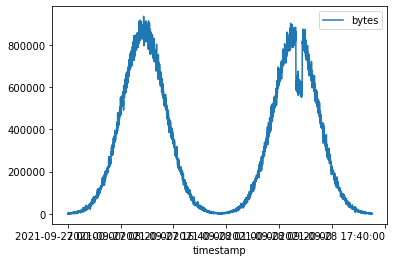

In [21]:
data.groupby(by='timestamp').sum().plot()

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

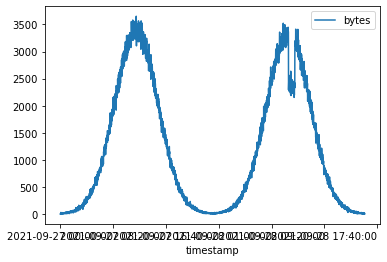

In [22]:
data.groupby(by='timestamp').mean().plot()

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

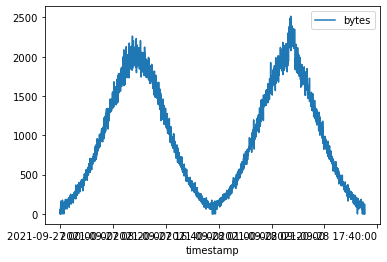

In [23]:
data.groupby(by='timestamp').std().plot()

In [24]:
data

,timestamp,bytes,user_id,zone
0,2021-09-27 00:00:00,0.0,c2b9546e,D
216150,2021-09-27 00:00:00,0.0,fac7c832,A
217591,2021-09-27 00:00:00,0.0,964747b1,D
219032,2021-09-27 00:00:00,0.0,13c60c31,D
24497,2021-09-27 00:00:00,0.0,593cf519,C
...,...,...,...,...
657095,2021-09-29 00:00:00,0.0,2215c8db,B
456796,2021-09-29 00:00:00,0.0,98ac952b,A
577840,2021-09-29 00:00:00,0.0,c7d4eab5,C
585045,2021-09-29 00:00:00,0.0,7c566478,B


In [25]:
agg_data = data.groupby(data.timestamp).sum()

In [26]:
agg_data['std(bytes)_rw3'] = agg_data['bytes'].rolling(3).std()
agg_data['std(bytes)_rw5'] = agg_data['bytes'].rolling(5).std()

In [27]:
agg_data['avg(bytes)_rw3'] = agg_data['bytes'].rolling(3).mean()
agg_data['avg(bytes)_rw5'] = agg_data['bytes'].rolling(5).mean()

In [28]:
agg_data['std(avg(bytes))_rw3'] = agg_data['avg(bytes)_rw3'].rolling(3).std()
agg_data['std(avg(bytes))_rw5'] = agg_data['avg(bytes)_rw5'].rolling(5).std()

In [29]:
agg_data

,bytes,std(bytes)_rw3,std(bytes)_rw5,avg(bytes)_rw3,avg(bytes)_rw5,std(avg(bytes))_rw3,std(avg(bytes))_rw5
timestamp,,,,,,,
2021-09-27 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27 00:01:00,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-27 00:02:00,0.0,577.350269,NaN,333.333333,NaN,NaN,NaN
2021-09-27 00:03:00,1000.0,577.350269,NaN,666.666667,NaN,NaN,NaN
2021-09-27 00:04:00,3000.0,1527.525232,1224.744871,1333.333333,1000.0,509.175077,NaN
...,...,...,...,...,...,...,...
2021-09-28 23:56:00,3000.0,577.350271,447.213595,2333.333333,2200.0,192.450097,260.768096
2021-09-28 23:57:00,2000.0,577.350271,447.213595,2333.333333,2200.0,192.450097,167.332005
2021-09-28 23:58:00,0.0,1527.525232,1095.445115,1666.666667,1800.0,384.900183,244.948974


/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '2021-09-28 15:41:00'),
  Text(0.0, 0, '2021-09-27 00:00:00'),
  Text(500.0, 0, '2021-09-27 08:20:00'),
  Text(1000.0, 0, '2021-09-27 16:40:00'),
  Text(1500.0, 0, '2021-09-28 01:00:00'),
  Text(2000.0, 0, '2021-09-28 09:20:00'),
  Text(2500.0, 0, '2021-09-28 17:40:00'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

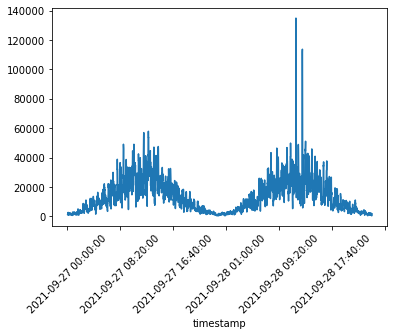

In [30]:
agg_data['std(bytes)_rw5'].plot()
plt.xticks(rotation=45)

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '2021-09-28 15:41:00'),
  Text(0.0, 0, '2021-09-27 00:00:00'),
  Text(500.0, 0, '2021-09-27 08:20:00'),
  Text(1000.0, 0, '2021-09-27 16:40:00'),
  Text(1500.0, 0, '2021-09-28 01:00:00'),
  Text(2000.0, 0, '2021-09-28 09:20:00'),
  Text(2500.0, 0, '2021-09-28 17:40:00'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

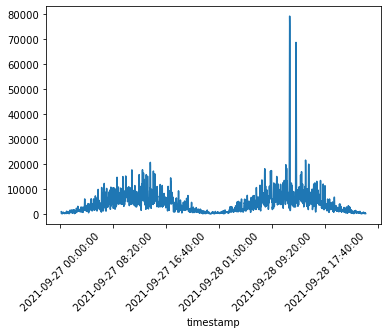

In [31]:
agg_data['std(avg(bytes))_rw5'].plot()
plt.xticks(rotation=45)

In [32]:
zone_grouping = data.groupby([data.zone, data.timestamp]).mean()

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '(A, 2021-09-28 15:41:00)'),
  Text(0.0, 0, '(A, 2021-09-27 00:00:00)'),
  Text(500.0, 0, '(A, 2021-09-27 08:20:00)'),
  Text(1000.0, 0, '(A, 2021-09-27 16:40:00)'),
  Text(1500.0, 0, '(A, 2021-09-28 01:00:00)'),
  Text(2000.0, 0, '(A, 2021-09-28 09:20:00)'),
  Text(2500.0, 0, '(A, 2021-09-28 17:40:00)'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

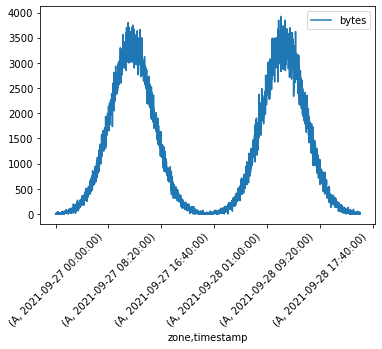

In [33]:
zone_grouping.iloc[:2881,:].plot()
plt.xticks(rotation=45)

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '(B, 2021-09-28 15:41:00)'),
  Text(0.0, 0, '(B, 2021-09-27 00:00:00)'),
  Text(500.0, 0, '(B, 2021-09-27 08:20:00)'),
  Text(1000.0, 0, '(B, 2021-09-27 16:40:00)'),
  Text(1500.0, 0, '(B, 2021-09-28 01:00:00)'),
  Text(2000.0, 0, '(B, 2021-09-28 09:20:00)'),
  Text(2500.0, 0, '(B, 2021-09-28 17:40:00)'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

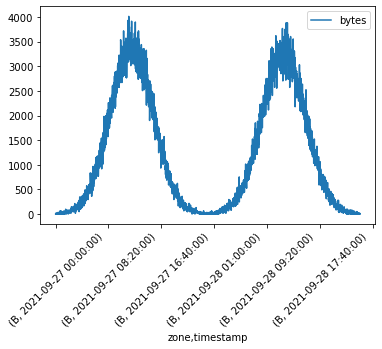

In [34]:
zone_grouping.iloc[2881:5762,:].plot()
plt.xticks(rotation=45)

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '(C, 2021-09-28 15:41:00)'),
  Text(0.0, 0, '(C, 2021-09-27 00:00:00)'),
  Text(500.0, 0, '(C, 2021-09-27 08:20:00)'),
  Text(1000.0, 0, '(C, 2021-09-27 16:40:00)'),
  Text(1500.0, 0, '(C, 2021-09-28 01:00:00)'),
  Text(2000.0, 0, '(C, 2021-09-28 09:20:00)'),
  Text(2500.0, 0, '(C, 2021-09-28 17:40:00)'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

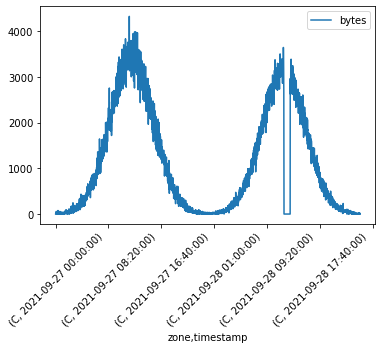

In [35]:
zone_grouping.iloc[5762:8643,:].plot()
plt.xticks(rotation=45)

In [36]:
zone_grouping.iloc[5762:8643,:][zone_grouping['bytes'] == 0]

/home/f5047145/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


bytes
zone timestamp                 
C    2021-09-27 00:00:00    0.0
     2021-09-27 00:01:00    0.0
     2021-09-27 00:02:00    0.0
     2021-09-27 00:03:00    0.0
     2021-09-27 00:07:00    0.0
...                         ...
     2021-09-28 23:48:00    0.0
     2021-09-28 23:49:00    0.0
     2021-09-28 23:53:00    0.0
     2021-09-28 23:58:00    0.0
     2021-09-29 00:00:00    0.0

[211 rows x 1 columns]

/home/f5047145/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '(D, 2021-09-28 15:41:00)'),
  Text(0.0, 0, '(D, 2021-09-27 00:00:00)'),
  Text(500.0, 0, '(D, 2021-09-27 08:20:00)'),
  Text(1000.0, 0, '(D, 2021-09-27 16:40:00)'),
  Text(1500.0, 0, '(D, 2021-09-28 01:00:00)'),
  Text(2000.0, 0, '(D, 2021-09-28 09:20:00)'),
  Text(2500.0, 0, '(D, 2021-09-28 17:40:00)'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

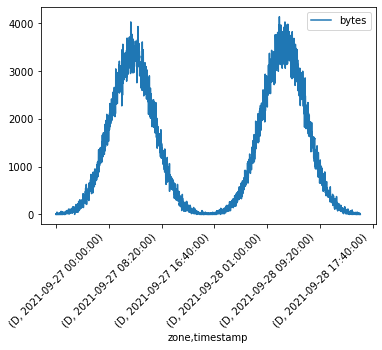

In [37]:
zone_grouping.iloc[8643:,:].plot()
plt.xticks(rotation=45)

## Beam

In [3]:
from __future__ import absolute_import
import argparse
import logging
import re
import apache_beam as beam
import numpy as np
from apache_beam.io import ReadFromText
from apache_beam.transforms import window
from apache_beam.io import WriteToText
from apache_beam.io import kafka
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.options.pipeline_options import SetupOptions
from apache_beam.dataframe.io import read_csv

In [39]:
class KeyValuePair(beam.DoFn):
    # Use classes and functions to perform transformations on your PCollections
    # Yield the element(s) needed as input for the next transform
    def process(self, element):
        list_element = element.split(",")
        if len(list_element) > 2 and list_element[0] != '':
            # e_dict = {list_element[0]: list_element[1:]}
            test = ((list_element[0], list_element[-1]), float(list_element[1]))
            element = test
            yield element
        elif list_element[0] != '':
            # e_dict = {list_element[-1]: list_element[0]}
            test = ((list_element[0], list_element[-1]), float(list_element[1]))
#             test = (list_element[0], float(list_element[1]))
            element = test
            yield element

In [40]:
class Anomaly_check(beam.DoFn):
    def process(self, element, *args, **kwargs):
        """
            TODO: Check the previous timestamp's mean and save the state of usage. 
            False flags during inactive internet usage accross zones.
        """
        mean_bytes = element[1]
        if mean_bytes > 1:
            total_dict = element[0], "Internet usage: ok"
        else:
            total_dict = element[0], "ERROR: NETWORK ERROR"
        return [total_dict]

In [41]:
p = beam.Pipeline()
input_path = 'data/syn-internet-usage.csv'

In [42]:
windowed_data = (p
                 |"read data into dataframe" >> ReadFromText(input_path)
                 |"key value creation" >> beam.ParDo(KeyValuePair())
                 |"window data" >> beam.WindowInto(window.SlidingWindows(15, 5))
                 |"group by count" >> beam.CombinePerKey(beam.combiners.MeanCombineFn())
                 |"check if anomaly" >> beam.ParDo(Anomaly_check())
                 |"print data" >> beam.Map(print)
                )

In [43]:
result = p.run()
result.wait_until_finish()

(('2021-09-27 00:00:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:00:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:00:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:01:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:01:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:01:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:02:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:02:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:02:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:03:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:03:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:03:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:04:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:04:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:04:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:05:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:05:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:05:00', 'D'), 'Internet usage: ok')
(('2021-09-27 00:06:00', 'D'

(('2021-09-27 10:51:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:52:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:52:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:52:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:54:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:54:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:54:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:57:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:57:00', 'D'), 'Internet usage: ok')
(('2021-09-27 10:57:00', 'D'), 'Internet usage

(('2021-09-27 22:52:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:53:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:54:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:54:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:54:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:55:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:56:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:57:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:57:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:57:00', 'D'), 'Internet usage: ok')
(('2021-09-27 22:58:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:58:00', 'D'), 'ERROR: NETWORK ERROR')
(('2021-09-27 22:58:00', 'D'), 'ER

(('2021-09-27 07:10:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:10:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:11:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:11:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:11:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:12:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:12:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:12:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:13:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:13:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:13:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:14:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:14:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:14:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:15:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:15:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:15:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:16:00', 'B'), 'Internet usage: ok')
(('2021-09-27 07:16:00', 'B'), 'Internet usage

(('2021-09-27 14:51:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:51:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:51:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:52:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:52:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:52:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:53:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:53:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:53:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:54:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:54:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:54:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:55:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:55:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:55:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:56:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:56:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:56:00', 'B'), 'Internet usage: ok')
(('2021-09-27 14:57:00', 'B'), 'Internet usage

(('2021-09-27 02:29:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:29:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:29:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:30:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:30:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:30:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:31:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:31:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:31:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:32:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:32:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:32:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:33:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:33:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:33:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:34:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:34:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:34:00', 'C'), 'Internet usage: ok')
(('2021-09-27 02:35:00', 'C'), 'Internet usage

(('2021-09-27 13:55:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:55:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:55:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:56:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:56:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:56:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:57:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:57:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:57:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:58:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:58:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:58:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:59:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:59:00', 'C'), 'Internet usage: ok')
(('2021-09-27 13:59:00', 'C'), 'Internet usage: ok')
(('2021-09-27 14:00:00', 'C'), 'Internet usage: ok')
(('2021-09-27 14:00:00', 'C'), 'Internet usage: ok')
(('2021-09-27 14:00:00', 'C'), 'Internet usage: ok')
(('2021-09-27 14:01:00', 'C'), 'Internet usage

(('2021-09-27 00:40:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:40:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:41:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:41:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:41:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:42:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:42:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:42:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:43:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:43:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:43:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:44:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:44:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:44:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:45:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:45:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:45:00', 'A'), 'Internet usage: ok')
(('2021-09-27 00:46:00', 'A'), 'ERROR: NETWORK ERROR')
(('2021-09-27 00:46:00', 'A'), 'ER

(('2021-09-27 11:29:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:30:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:30:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:30:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:31:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:31:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:31:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:32:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:32:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:32:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:33:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:33:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:33:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:34:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:34:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:34:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:35:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:35:00', 'A'), 'Internet usage: ok')
(('2021-09-27 11:35:00', 'A'), 'Internet usage

(('2021-09-27 19:21:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:21:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:22:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:22:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:22:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:23:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:23:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:23:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:24:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:24:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:24:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:25:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:25:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:25:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:26:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:26:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:26:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:27:00', 'A'), 'Internet usage: ok')
(('2021-09-27 19:27:00', 'A'), 'Internet usage

(('2021-09-28 07:33:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:33:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:34:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:34:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:34:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:35:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:35:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:35:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:36:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:36:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:36:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:37:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:37:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:37:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:38:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:38:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:38:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:39:00', 'A'), 'Internet usage: ok')
(('2021-09-28 07:39:00', 'A'), 'Internet usage

(('2021-09-28 18:40:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:40:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:40:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:41:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:41:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:41:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:42:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:42:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:42:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:43:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:43:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:43:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:44:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:44:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:44:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:45:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:45:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:45:00', 'A'), 'Internet usage: ok')
(('2021-09-28 18:46:00', 'A'), 'Internet usage

(('2021-09-28 06:35:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:36:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:36:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:36:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:37:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:37:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:37:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:38:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:38:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:38:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:39:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:39:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:39:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:40:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:40:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:40:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:41:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:41:00', 'B'), 'Internet usage: ok')
(('2021-09-28 06:41:00', 'B'), 'Internet usage

(('2021-09-28 18:06:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:06:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:06:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:07:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:07:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:07:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:08:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:08:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:08:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:09:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:09:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:09:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:10:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:10:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:10:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:11:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:11:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:11:00', 'B'), 'Internet usage: ok')
(('2021-09-28 18:12:00', 'B'), 'Internet usage

(('2021-09-28 01:39:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:40:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:40:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:40:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:41:00', 'C'), 'ERROR: NETWORK ERROR')
(('2021-09-28 01:41:00', 'C'), 'ERROR: NETWORK ERROR')
(('2021-09-28 01:41:00', 'C'), 'ERROR: NETWORK ERROR')
(('2021-09-28 01:42:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:42:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:42:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:43:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:43:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:43:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:44:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:44:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:44:00', 'C'), 'Internet usage: ok')
(('2021-09-28 01:45:00', 'C'), 'ERROR: NETWORK ERROR')
(('2021-09-28 01:45:00', 'C'), 'ERROR: NETWORK ERROR')
(('2021-09-28 01:45:00', 'C'), 'ERRO

(('2021-09-28 09:14:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:15:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:15:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:15:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:16:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:16:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:16:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:17:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:17:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:17:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:18:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:18:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:18:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:19:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:19:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:19:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:20:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:20:00', 'C'), 'Internet usage: ok')
(('2021-09-28 09:20:00', 'C'), 'Internet usage

(('2021-09-28 17:52:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:52:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:53:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:53:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:53:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:54:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:54:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:54:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:55:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:55:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:55:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:56:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:56:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:56:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:57:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:57:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:57:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:58:00', 'C'), 'Internet usage: ok')
(('2021-09-28 17:58:00', 'C'), 'Internet usage

(('2021-09-28 04:54:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:55:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:55:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:55:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:56:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:56:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:56:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:57:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:57:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:57:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:58:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:58:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:58:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:59:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:59:00', 'D'), 'Internet usage: ok')
(('2021-09-28 04:59:00', 'D'), 'Internet usage: ok')
(('2021-09-28 05:00:00', 'D'), 'Internet usage: ok')
(('2021-09-28 05:00:00', 'D'), 'Internet usage: ok')
(('2021-09-28 05:00:00', 'D'), 'Internet usage

(('2021-09-28 12:14:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:15:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:15:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:15:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:16:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:16:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:16:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:17:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:17:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:17:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:18:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:18:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:18:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:19:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:19:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:19:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:20:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:20:00', 'D'), 'Internet usage: ok')
(('2021-09-28 12:20:00', 'D'), 'Internet usage

(('2021-09-28 20:41:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:41:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:41:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:42:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:42:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:42:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:43:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:43:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:43:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:44:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:44:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:44:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:45:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:45:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:45:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:46:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:46:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:46:00', 'D'), 'Internet usage: ok')
(('2021-09-28 20:47:00', 'D'), 'Internet usage

'DONE'

## Streaming Implementation

### Streaming solution implements stateful processing

Stateful processing is use to test if both the entire group, a zone or users are experiencing a internet outages (https://beam.apache.org/blog/stateful-processing/ | https://medium.com/google-cloud/stateful-processing-in-apache-beam-cloud-dataflow-109d1880f76a)

In [4]:
stream_pipeline = beam.Pipeline()

In [5]:
from beam_nuggets.io import kafkaio
import json
import math
from apache_beam import DoFn
from apache_beam.transforms.userstate import BagStateSpec
from apache_beam.coders.coders import TupleCoder, StrUtf8Coder
from apache_beam import window
from apache_beam import trigger
from datetime import datetime
import logging


consumer_config = {"topic": "intelliblock_stream",
                   "bootstrap_servers": "localhost:9092"}
logging.getLogger().setLevel(logging.ERROR)
pipeline_options = PipelineOptions()

In [6]:
class RunningStats(object):
    """This better way of computing variance goes back to a 1962 paper by B. P. Welford and
    is presented in Donald Knuths Art of Computer Programming, Vol 2, page 232, 3rd edition.
    Calculates approximated values"""

    def __init__(self):
        self.n = 0.0
        self.old_m = 0.0
        self.new_m = 0.0
        self.old_s = 0.0
        self.new_s = 0.0

    def clear(self):
        self.n = 0.0

    def push(self, x):
        self.n += 1

        if self.n == 1:
            self.old_m = self.new_m = x
            self.old_s = 0.0
        else:
            self.new_m = self.old_m + (x - self.old_m) / self.n
            self.new_s = self.old_s + (x - self.old_m) * (x - self.new_m)

            self.old_m = self.new_m
            self.old_s = self.new_s

    def mean(self):
        return self.new_m if self.n else 0.0

    def variance(self):
        return self.new_s / (self.n - 1) if self.n > 1 else 0.0

    def standard_deviation(self):
        return math.sqrt(self.variance())

In [7]:
class SetPacketKeyFn(beam.DoFn):
    # Use classes and functions to perform transformations on your PCollections
    # Yield the element(s) needed as input for the next transform
    def process(self, element):
            element = json.loads(element[1])
            yield element['user_id'], element

In [8]:
from apache_beam import DoFn

class FormatMetricsData(DoFn):

    def setup(self):
        logging.getLogger().error(f"FormatMetricsData set up error")
        self.time_format = TIME_FORMAT

    def process(self, element):
        logging.getLogger().error(f"FormatMetricsData process error")
        logging.getLogger().error(f"element to processs {element}")
        current_metrics = dumps(
            {'outages': element[0],
             'available': element[1],
             'timestamp': datetime.now().strftime(self.time_format)}).encode('utf-8')
        logging.getLogger().error(f"current metrics {current_metrics}")
        yield current_metrics

In [9]:
from apache_beam import CombineFn

# CombineFn for handling global accumulator
class GetCurrentJobMetrics(CombineFn):

    # Defining the accmulator init state
    def create_accumulator(self):
        logging.getLogger().error(f"this is create accumlator")
        return 0, 0

    # Merges accumulators across all keys together since you can't guarantee all keys are
    # processed on the same machine.
    def merge_accumulators(self, accumulators):
        logging.getLogger().error(f"this is merge accumlators{accumulators}")
#         logging.getLogger().error(f"{type(accumulator)}")
        busy = sum([accum[0] for accum in accumulators])
        available = sum([accum[1] for accum in accumulators])
        yield busy, available

    def add_input(self, accumulator, input):
        logging.getLogger().error(f" add input {accumulator}")
        return accumulator[0] + input[0], accumulator[1] + input[1]

    def extract_output(self, accumulator):
        logging.getLogger().error(f"this is extract output accumlators{accumulator}")
        return accumulator

In [10]:
TIME_FORMAT = '%Y-%m-%d %H:%M:%S'

def to_unix_time(time_str, format=TIME_FORMAT):
    epoch = datetime.utcfromtimestamp(0)
    dt = datetime.strptime(time_str, format)
    return (dt - epoch).total_seconds() * 1000.0

In [11]:
def custom_timestamp(message):
    """
    you need to tell Beam which field is your event time. This stub is assuming the 'message' is
    a row with a field 'timestamp', which is being indexed here. Do here as you wish.
    :param message:
    :return:
    """
    ts = datetime.strptime(message['timestamp'], "%Y-%m-%d %H:%M:%S")
    return beam.window.TimestampedValue(message, ts.timestamp())

In [12]:
def print_windows(element, window=beam.DoFn.WindowParam,  pane_info=beam.DoFn.PaneInfoParam, timestamp=beam.DoFn.TimestampParam):
    print(window)
    print(pane_info)
    print(timestamp)
    print(element)
    print('-----------------')

In [13]:
# Stateful ParDo for storing most recent status of user_id
class StatefulParDoFn(DoFn):
    packet_STATE = BagStateSpec('user', TupleCoder((StrUtf8Coder(), StrUtf8Coder(), StrUtf8Coder())))

    def __init__(self):
        self.ACTIVE = "active"
        self.OUTAGE = "outages"
        self.running_stat = RunningStats()

    def process(self, element, prev_packet_state=DoFn.StateParam(packet_STATE)):

        curr_packet_user_id = element[0]
#         logging.getLogger().fatal(f"user ID: {curr_packet_user_id}")
        curr_packet_bytes = element[1]["bytes"]
        curr_packet_zone =  element[1]["zone"]
        curr_packet_timestamp = element[1]['timestamp']
        
        prev_packet_info = [x for x in prev_packet_state.read()]
        update_packet_flag = False
        new_packet_info = [0,0]
        
        if prev_packet_info:
            prev_packet_timestamp = prev_packet_info[0][0]
            prev_packet_bytes = prev_packet_info[0][2]
            
            if to_unix_time(curr_packet_timestamp) - to_unix_time(prev_packet_timestamp) > 0:
                old_mean = self.running_stat.mean() 
                number_of_elements_seen = self.running_stat.n


                #logging.getLogger().info(f"number of elements {number_of_elements_seen}")
                if number_of_elements_seen < global_window_after_processing_time:
                    self.running_stat.push(curr_packet_bytes)
                    new_mean = self.running_stat.mean()
                else:
                    #logging.getLogger().info(f"new mean {old_mean}")
                    prev_packet_state.clear()
                    prev_packet_state.add((curr_packet_timestamp,curr_packet_zone, curr_packet_bytes))
                    update_packet_flag = True
                    
                    self.running_stat.push(curr_packet_bytes)
                    self.running_stat.n = global_window_after_processing_time
                    new_mean = self.running_stat.mean()

                if old_mean == 0:
                    new_packet_info[1] = 1
                else:
                    new_packet_info[0] = 1

            else:
#                 logging.getLogger().error(f" new packet info being sent value{type(new_packet_info)}")
                yield tuple([0,0])
            
        else:
            prev_packet_state.add((curr_packet_timestamp, curr_packet_zone, curr_packet_bytes))
            update_packet_flag = True
            n  = self.running_stat.n
            if n < global_window_after_processing_time:
                self.running_stat.push(curr_packet_bytes)
                #logging.getLogger().info(f"number of elements {self.running_stat.n}")
                
        if update_packet_flag:
            #logging.getLogger().info(f"number of elements {str(self.running_stat.mean())}")
            if self.running_stat.mean() == 0:
                #logging.getLogger().error(f"OUTAGE {curr_packet_timestamp}")
                new_packet_info[1] = 1
            else:
                new_packet_info[0] = 1
            
#             logging.getLogger().error(f"update packe yield value {type(new_packet_info)}")
#             logging.getLogger().error(f"{new_packet_info}")
            yield tuple(new_packet_info)


In [17]:
global_window_after_processing_time = 2
global_window_after_count = 5

In [19]:
with beam.Pipeline(options=pipeline_options) as p:
    notifications = p | "Reading messages from Kafka" >> kafkaio.KafkaConsume(
        consumer_config=consumer_config,
        value_decoder=bytes.decode,
    )
    indexed_packet_info = (notifications | 'keyPairDo' >> beam.ParDo(SetPacketKeyFn()))
    
    user_status = (indexed_packet_info | "BagStatefulDoFn" >> beam.ParDo(StatefulParDoFn()))
    user_tuple_status_global_window = (user_status | "GlobalWindow" >> beam.WindowInto(window.GlobalWindows(),
         trigger=beam.trigger.Repeatedly(
             trigger.AfterAny(trigger.AfterProcessingTime(global_window_after_processing_time),
             trigger.AfterCount(global_window_after_count))),
         accumulation_mode=beam.trigger.AccumulationMode.ACCUMULATING))
    
#     user_status_count = (user_tuple_status_global_window | "CombineGlobally" >> beam.CombineGlobally(GetCurrentJobMetrics()).without_defaults())
#     formatted_user_data = (user_status_count | "FormatMetrics" >> beam.ParDo(FormatMetricsData()))
#     (formatted_user_data | "LogOutput" >> beam.Map(lambda i: logging.getLogger().error(f"Result: {i}")))
    (user_tuple_status_global_window | "print" >> beam.Map(print))

(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(0, 1)
(1, 1)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)

(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(0, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)

(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)
(1, 0)

RuntimeError: KeyboardInterrupt [while running '[19]: Reading messages from Kafka/ParDo(_ConsumeKafkaTopic)']